# Fashion-MNIST 辨識

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

2024-08-13 21:10:35.261822: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 21:10:35.271608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 21:10:35.283763: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 21:10:35.287026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 21:10:35.297095: I tensorflow/core/platform/cpu_feature_guar

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [3]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001001100110000110',
 '0000000000001011111000111001',
 '0000000000001011111110000110',
 '0000000000000011111111111111',
 '0000000000010111111111111111',
 '0000000001110111111111111110',
 '0000000000000111111111111110',
 '0000000000000111111111111110',
 '0000000001101111111111111111',
 '0000000000101111111111111111',
 '0000000001001111111111111110',
 '0011111000001111111111111110',
 '0100000001111111111111111110',
 '0000111111111111111111111110',
 '0111111111111111111111111110',
 '1111111111111111111111111110',
 '1111111111111111111111111111',
 '1111111111111111111111111111',
 '1111111111111111111111111111',
 '0111111111111111111111111111',
 '0011111111111111111111111110',
 '1000111111111111111111111100',
 '0000000111111000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [5]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000010000111111111100000000',
 '0001000111111111111111100000',
 '0000011111111111111111110000',
 '0000011111111111111111111000',
 '0000111111111111111111111000',
 '0000111111111111111111111000',
 '0000111111011011111011111100',
 '0000111111011111111011111100',
 '0001111111011111111011111100',
 '0001111111111111111111111100',
 '0001111111111111111111111100',
 '0000011111111111111111000000',
 '0000000111111111111111000000',
 '0000110111111111111111011000',
 '0000010111111111111111010000',
 '0000010111111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000000011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000000011111111111111000000',
 '0000000011111111111111010000',
 '0000010011111111111111000000']

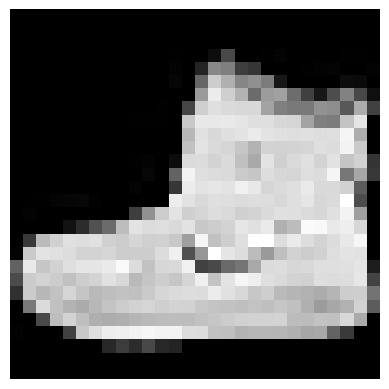

In [6]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

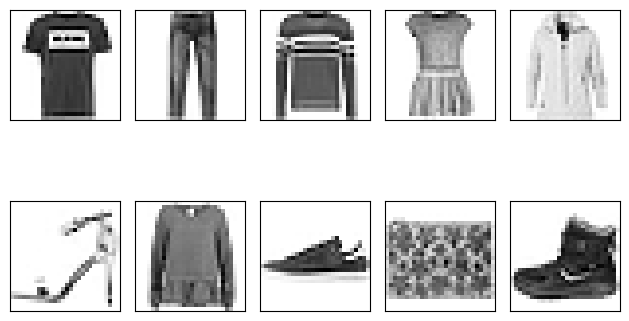

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

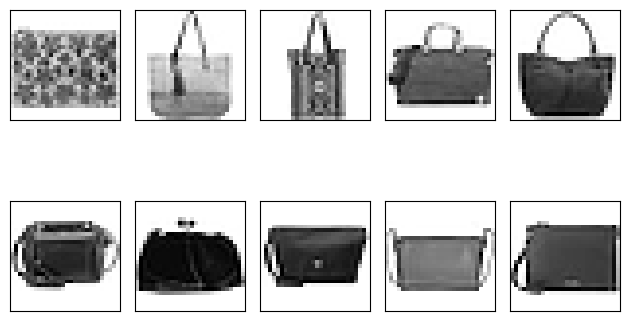

In [8]:
no=8
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [9]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [10]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

/home/chesterxalan/GitHub/Classwork/Classwork-PythonMLApplicationDevelopment/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1723554667.106116   52819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723554667.176695   52819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723554667.176753   52819 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723554667.182344   52819 c

In [11]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [12]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


I0000 00:00:1723554680.126152   53249 service.cc:146] XLA service 0x7fe1d0006f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723554680.126199   53249 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-13 21:11:20.143367: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-13 21:11:20.214337: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  91/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4983 - loss: 1.4134

I0000 00:00:1723554681.130333   53249 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7503 - loss: 0.7089 - val_accuracy: 0.8213 - val_loss: 0.4642
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8511 - loss: 0.4178 - val_accuracy: 0.8648 - val_loss: 0.3782
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8648 - loss: 0.3756 - val_accuracy: 0.8723 - val_loss: 0.3567
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8708 - loss: 0.3512 - val_accuracy: 0.8658 - val_loss: 0.3635
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8719 - loss: 0.3460 - val_accuracy: 0.8719 - val_loss: 0.3507


In [13]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

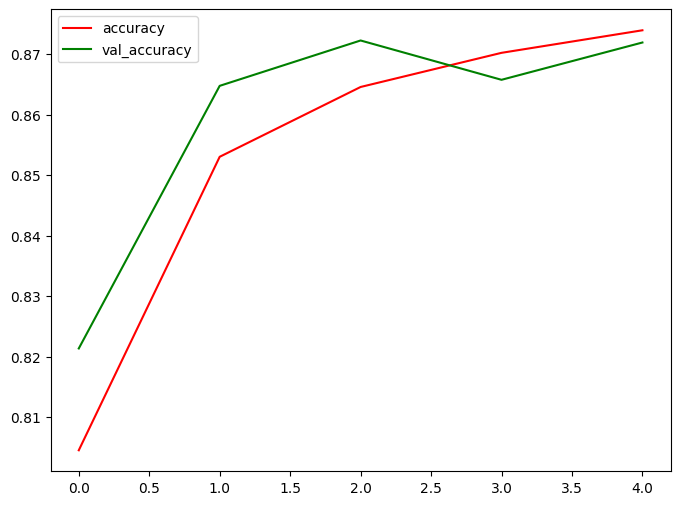

In [14]:
# 對訓練過程的準確率繪圖

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='val_accuracy')
plt.legend()

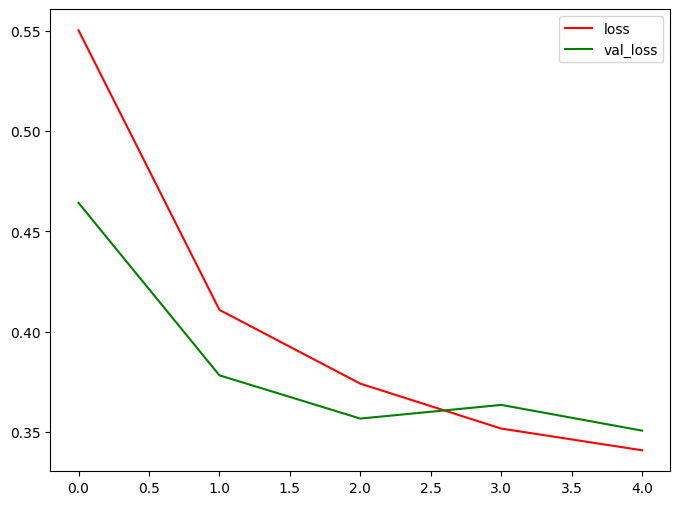

In [15]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='loss')
plt.plot(history.history['val_loss'], 'g', label='val_loss')
plt.legend()

## 步驟7：評分(Score Model)

In [16]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.3767
compile_metrics: 0.8646


In [17]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
actual    : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
prediction: [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]


In [18]:
# 顯示第 18 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[17:18])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
0~9預測機率: [[0.   0.   0.53 0.   0.35 0.   0.13 0.   0.   0.  ]]


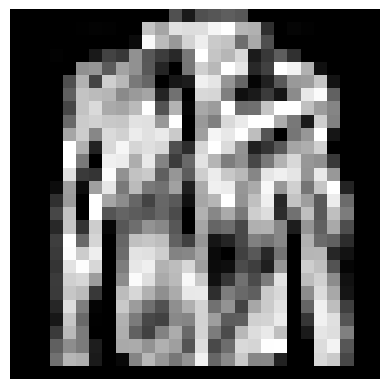

In [19]:
# 顯示第 9 筆圖像
X2 = x_test[17,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [25]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

## 步驟10：新資料預測

## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [20]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

## 繪製模型
#### 需安裝 graphviz (https://www.graphviz.org/download/)
#### 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
#### pip install graphviz pydotplus

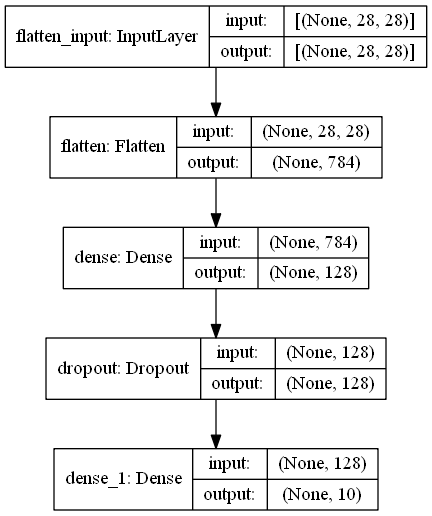

In [27]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [21]:
import pandas as pd 
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,779,3,16,47,8,1,141,0,5,0
1,1,970,0,22,4,0,3,0,0,0
2,9,1,646,13,228,0,101,0,2,0
3,11,10,8,904,31,0,32,0,4,0
4,0,1,36,40,865,0,56,0,2,0
5,0,0,0,0,0,946,0,29,1,24
6,96,2,52,40,106,0,693,0,11,0
7,0,0,0,0,0,22,0,905,0,73
8,5,0,1,5,7,2,16,4,960,0


In [29]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=np.argmax(model.predict(x_test_norm), axis=-1))

array([[851,   0,  20,  33,   4,   1,  82,   0,   9,   0],
       [  1, 958,   2,  28,   5,   0,   3,   0,   3,   0],
       [ 23,   0, 766,   6, 165,   0,  37,   0,   3,   0],
       [ 20,   4,  21, 890,  41,   0,  20,   0,   4,   0],
       [  1,   0,  72,  21, 863,   0,  42,   0,   1,   0],
       [  0,   0,   0,   1,   0, 967,   0,  21,   1,  10],
       [145,   0, 111,  35,  89,   0, 601,   0,  19,   0],
       [  0,   0,   0,   0,   0,  29,   0, 944,   0,  27],
       [  3,   0,   3,   5,   6,   3,   4,   2, 974,   0],
       [  0,   0,   0,   0,   0,  14,   1,  28,   0, 957]], dtype=int64)

In [30]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

In [31]:
model.get_weights()

[array([[ 0.00904319, -0.0114498 ,  0.12560602, ...,  0.06408109,
         -0.0383949 ,  0.1595284 ],
        [ 0.01671357,  0.07083189,  0.08573747, ...,  0.28730196,
          0.10186478,  0.22327457],
        [-0.15026861,  0.19393986, -0.06370054, ...,  0.2099848 ,
          0.04204631,  0.13781425],
        ...,
        [-0.09553955,  0.0015809 , -0.04456357, ..., -0.03929948,
          0.09726767,  0.31348428],
        [ 0.03011964, -0.0607936 ,  0.01444877, ..., -0.03204211,
          0.05228371,  0.0052085 ],
        [-0.08319265,  0.2081314 ,  0.15674412, ...,  0.20224434,
         -0.16544652,  0.04110098]], dtype=float32),
 array([ 0.45145166, -0.11733589,  0.14372878,  0.23672667, -0.19838461,
        -0.34962776,  0.43101624, -0.01602526,  0.02839877,  0.4521139 ,
         0.0895858 ,  0.22019705,  0.88002765, -0.23883179,  0.49669084,
         0.4099344 , -0.00589142, -0.05673464, -0.16708691, -0.1353294 ,
        -0.11290877, -0.2770225 ,  0.32322425, -0.02305933, -0.111

In [32]:
model.get_layer(index=1).name

'dense'

In [33]:
model.get_layer(index=1).get_weights()

[array([[ 0.00904319, -0.0114498 ,  0.12560602, ...,  0.06408109,
         -0.0383949 ,  0.1595284 ],
        [ 0.01671357,  0.07083189,  0.08573747, ...,  0.28730196,
          0.10186478,  0.22327457],
        [-0.15026861,  0.19393986, -0.06370054, ...,  0.2099848 ,
          0.04204631,  0.13781425],
        ...,
        [-0.09553955,  0.0015809 , -0.04456357, ..., -0.03929948,
          0.09726767,  0.31348428],
        [ 0.03011964, -0.0607936 ,  0.01444877, ..., -0.03204211,
          0.05228371,  0.0052085 ],
        [-0.08319265,  0.2081314 ,  0.15674412, ...,  0.20224434,
         -0.16544652,  0.04110098]], dtype=float32),
 array([ 0.45145166, -0.11733589,  0.14372878,  0.23672667, -0.19838461,
        -0.34962776,  0.43101624, -0.01602526,  0.02839877,  0.4521139 ,
         0.0895858 ,  0.22019705,  0.88002765, -0.23883179,  0.49669084,
         0.4099344 , -0.00589142, -0.05673464, -0.16708691, -0.1353294 ,
        -0.11290877, -0.2770225 ,  0.32322425, -0.02305933, -0.111

In [34]:
model.count_params()

101770